## NAME: THOMAS AMO KYEIMIAH 
-----

```STUDENT ID: 261121054```

```COURSE: ATOC 513```

```HOMEWORK 3```

1. Consider an initial condition for which some field of interest ($\eta$, say) is a Gaussian in x.
Take the domain to be periodic, so that $\eta (x + L) = \eta(x)$ and assume the Gaussian width,
$L_G$ is small compared to $L$. That is, $\epsilon = L_G/L <<  1$. The Fourier transform of a Gaussian
is a Gaussian in wavenumber $k_x$. If we nondimensionalize so that instead of going from
$−L/2 ≤ x ≤ L/2$, we instead define a nondimensional $x$ such that $−0.5 ≤ x_n ≤ 0.5$, then
the nondimensional Gaussian width becomes $\epsilon$. It then works out that $$\eta(x_n) = e^{-(x_n/\epsilon)^2}= \sum_{n=0}^{\infty}A_n(k) cos(2\pi kx_n)$$
Here $A_n(k) = Ae^{-(\epsilon \pi k)^2}$ where $A = (\epsilon^2 \pi)^{1/2}$
The index k is a counter i.e., $k = 0, 1, 2, 3. . . .$
The dimensional wavenumbers discussed in class correponds to $k_x = 2\pi k/L$. Write a program to numerically sum together a large number of cosines to get a Gaussian, such as the one above. Note that using $1000$ cosines corresponds to $2000$ points in $x$ (i.e., since the shortest resolved wave has a wavelength of $2\Delta x$). Thus, for example, if $\epsilon = 0.025$,
then the (half) Gaussian is resolved by about 25 grid points.

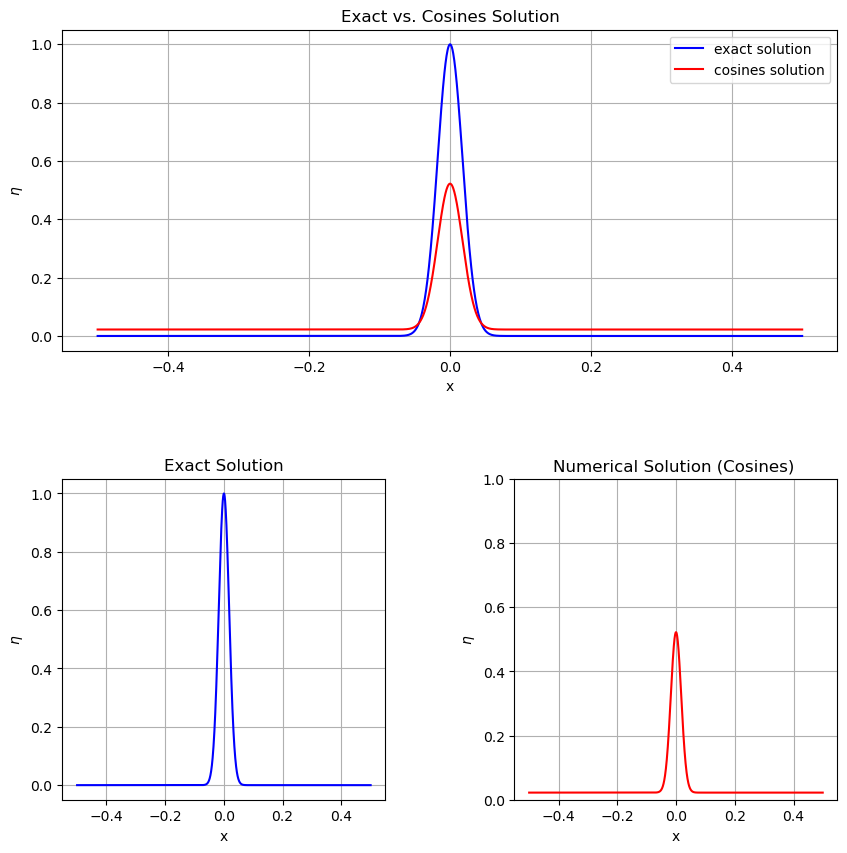

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Define parameters
L = 1.0  # Domain length
epsilon = 0.025  # Gaussian width
N = 1000  # Number of cosines to sum

# Define grid points
x = np.linspace(-0.5, 0.5, N*2, endpoint=False)

# Define Fourier coefficients
A = (epsilon**2 * np.pi)**0.5
k = np.arange(N)
Ak = A * np.exp(-(epsilon * np.pi * k)**2)

# Compute Gaussian using Fourier series
eta = np.zeros_like(x)
for n in range(N):
    eta += Ak[n] * np.cos(2*np.pi*k[n]*x)

# Compute exact Gaussian
exact = np.exp(-(x/epsilon)**2)

# Create the figure and GridSpec object
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(2, 2, figure=fig)

# Create an axis object that spans both columns in the second row
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(x, exact, label='exact solution', color='blue')
ax1.plot(x, eta, label= 'cosines solution',color='red')
ax1.set_xlabel('x')
ax1.set_ylabel('$\eta$')
ax1.set_title('Exact vs. Cosines Solution')
ax1.grid()
ax1.legend()

# Plot the second plot on the first set of axes
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(x, exact, color='blue')
ax2.set_ylabel('$\eta$')
ax2.set_title('Exact Solution')
ax2.set_xlabel('x')
ax2.grid()

# Plot the second plot on the second set of axes
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(x, eta, color='red')
ax3.set_title('Numerical Solution (Cosines) ')
ax3.set_ylim(0,1)
ax3.set_xlabel('x')
ax3.set_ylabel('$\eta$')
ax3.grid()

# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# save the plots
plt.savefig('number1.jpg',dpi=300)

# Show the plots
plt.show()

Next, assume a dispersion relation and replot the sum of all of these cosines at a later
time when the phases of all the cosines has been shifted by an amount $ −\omega(k_x)t$. Do this
for the following cases:

1. (a) Poincarre waves:

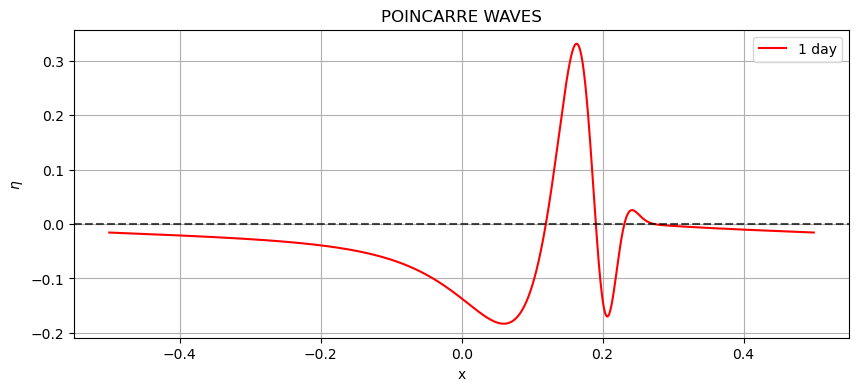

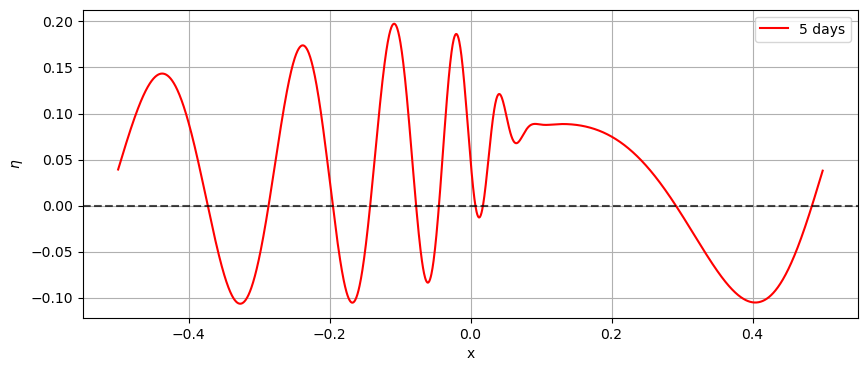

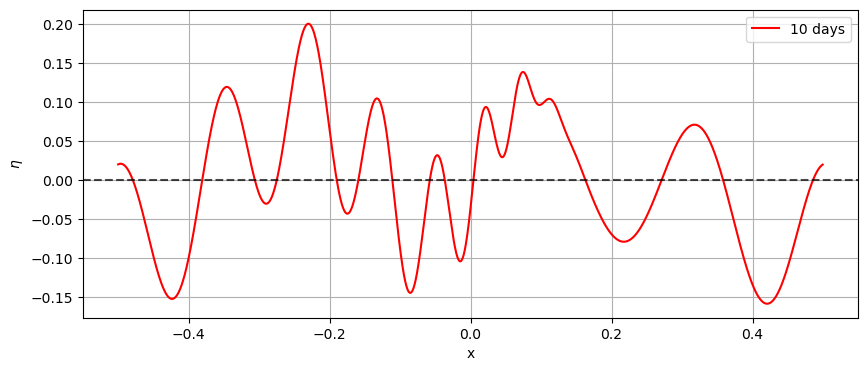

In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

# Set up the parameters
L = 4e6  # domain size
epsilon = 0.025  # Gaussian width
L_d = epsilon * L  # dispersion length scale
n_cosines = 1000  # number of cosines to use
n_points = n_cosines * 2  # number of points in x
f = 1e-4  # Coriolis parameter
c = f * L_d  # wave speed

# Set up the x axis
x = np.linspace(-0.5, 0.5, n_points, endpoint=False)

# Calculating k, k_x and A_n
k = np.arange(n_cosines)
A_n = np.sqrt(epsilon**2 * np.pi) * np.exp(-(epsilon * np.pi * k)**2)
k_x= 2 * np.pi * k / L

# Calculate the frequency and phase shift
omega = np.sqrt((c**2 * k_x **2) + f**2)
phase_shift = omega * 86400  # days to seconds 


# Loop over different times
times = [1, 5, 10]  # in days
for t in times:
    # Calculate the Fourier series at the given time
    eta = np.zeros_like(x)
    for i in range(n_cosines):
        eta += A_n[i] * np.cos(2 * np.pi * k[i] * x - phase_shift[i] * t)

    # Plot the results
    fig=plt.figure(figsize=(10,4))
    if t==1:
        plt.plot(x, eta, label=f"{t} day", color='red')
    else:
        plt.plot(x, eta, label=f"{t} days", color='red')
    plt.xlabel('x')
    plt.ylabel('$\eta$')
    if t==1:
        plt.title('Poincarre Waves'.upper())
    else:
        pass
    plt.grid()
    plt.axhline(y=0, color='black', ls= '--', alpha=0.7 )
    plt.legend()
    plt.savefig('number1a_'+str(t), dpi=300)
    plt.show()

1. (b) Rossby waves: i. For the atmosphere case, take LG ∼ Ld and do plots, say, for 1, 5, 10 days.

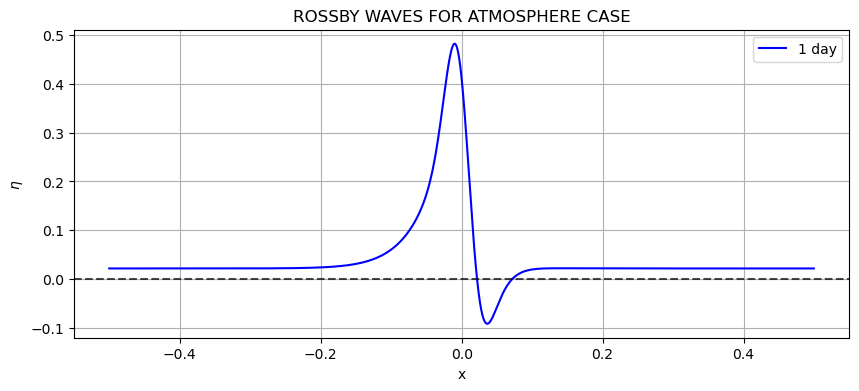

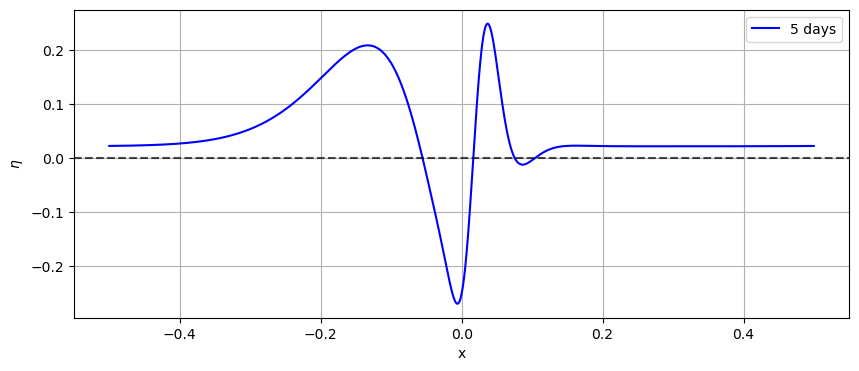

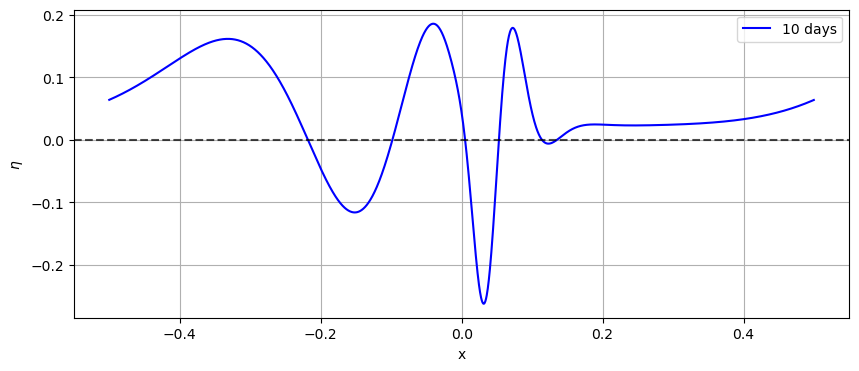

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the parameters
L = 4e7  # domain size
epsilon = 0.025  # Gaussian width
L_d = 1e6   # dispersion length scale
n_cosines = 1000  # number of cosines to use
n_points = n_cosines * 2  # number of points in x
beta=2e-11   # typical value of beta

# Set up the x axis
x = np.linspace(-0.5, 0.5, n_points, endpoint=False)

# Calculating k, k_x and A_n
k = np.arange(n_cosines)
A_n = np.sqrt(epsilon**2 * np.pi) * np.exp(-(epsilon * np.pi * k)**2)
k_x= 2 * np.pi * k / L

# Calculate the frequency and phase shift
omega = - (beta*k_x)/(k_x**2+L_d**(-2))
phase_shift = omega * 86400  # days to seconds 


# Loop over different times
times = [1, 5, 10]  # in days
for t in times:
    # Calculate the Fourier series at the given time
    eta = np.zeros_like(x)
    for i in range(n_cosines):
        eta += A_n[i] * np.cos(2 * np.pi * k[i] * x - phase_shift[i] * t)

    # Plot the results
    fig=plt.figure(figsize=(10,4))
    if t==1:
        plt.plot(x, eta, label=f"{t} day", color='blue')
    else:
        plt.plot(x, eta, label=f"{t} days", color='blue')
    plt.xlabel('x')
    plt.ylabel('$\eta$')
    if t==1:
        plt.title('Rossby Waves For atmosphere case'.upper())
    else:
        pass
    plt.grid()
    plt.axhline(y=0, color='black', ls= '--', alpha=0.7 )
    plt.legend()
    plt.savefig('number1bi_'+str(t), dpi=300)
    plt.show()

1. (b) Rossby waves: ii. For the ocean, do a few different cases (e.g., LG ∼ Ld and LG several times larger than Ld). The evolution will also be slower, so, for example, do plots for 1, 5, and 10 months.

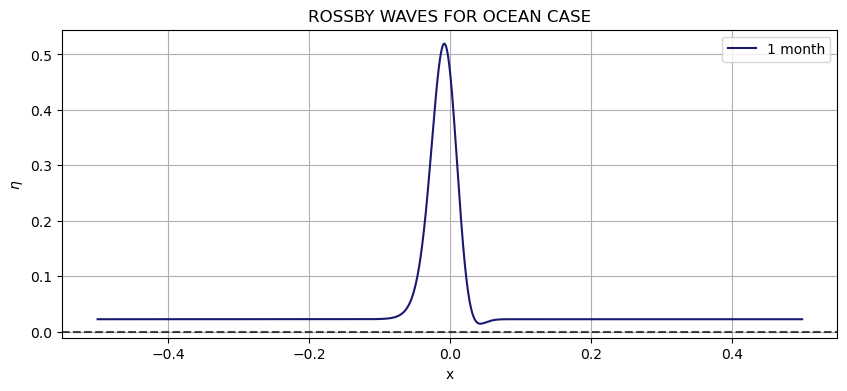

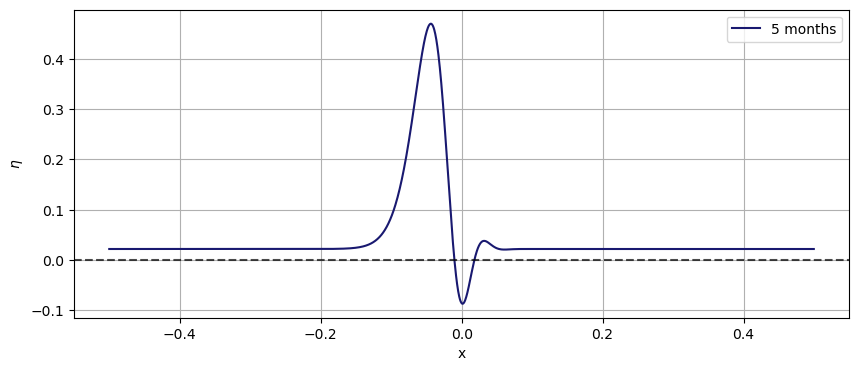

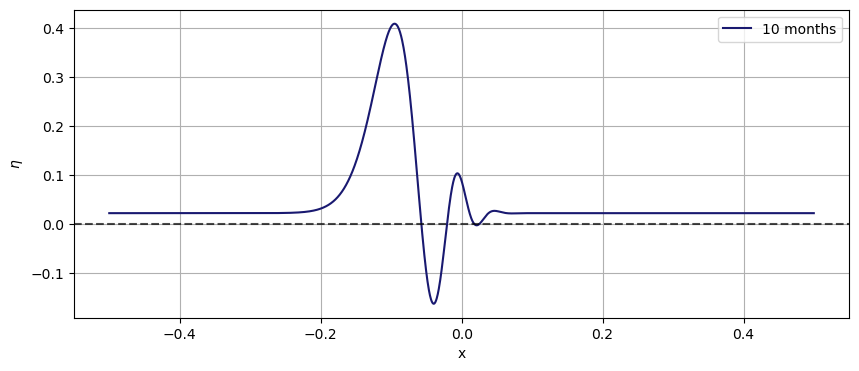

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the parameters
L = 4e6  # domain size
epsilon = 0.025  # Gaussian width
L_d = 3e4   # dispersion length scale
n_cosines = 1000  # number of cosines to use
n_points = n_cosines * 2  # number of points in x
beta=2e-11   # typical value of beta

# Set up the x axis
x = np.linspace(-0.5, 0.5, n_points, endpoint=False)

# Calculating k, k_x and A_n
k = np.arange(n_cosines)
A_n = np.sqrt(epsilon**2 * np.pi) * np.exp(-(epsilon * np.pi * k)**2)
k_x= 2 * np.pi * k / L

# Calculate the frequency and phase shift
omega = - (beta*k_x)/(k_x**2+L_d**(-2))
phase_shift = omega * 2.628e+6  # months to seconds 


# Loop over different times
times = [1, 5, 10]  # in months
for t in times:
    # Calculate the Fourier series at the given time
    eta = np.zeros_like(x)
    for i in range(n_cosines):
        eta += A_n[i] * np.cos(2 * np.pi * k[i] * x - phase_shift[i] * t)

    # Plot the results
    fig=plt.figure(figsize=(10,4))
    if t==1:
        plt.plot(x, eta, label=f"{t} month", color='midnightblue')
    else:
        plt.plot(x, eta, label=f"{t} months", color='midnightblue')
    plt.xlabel('x')
    plt.ylabel('$\eta$')
    if t==1:
        plt.title('Rossby Waves For OCEAN case'.upper())
    else:
        pass
    plt.grid()
    plt.axhline(y=0, color='black', ls= '--', alpha=0.7 )
    plt.legend()
    plt.savefig('number1bii_'+str(t), dpi=300)
    plt.show()

1. (c) Surface gravity waves:

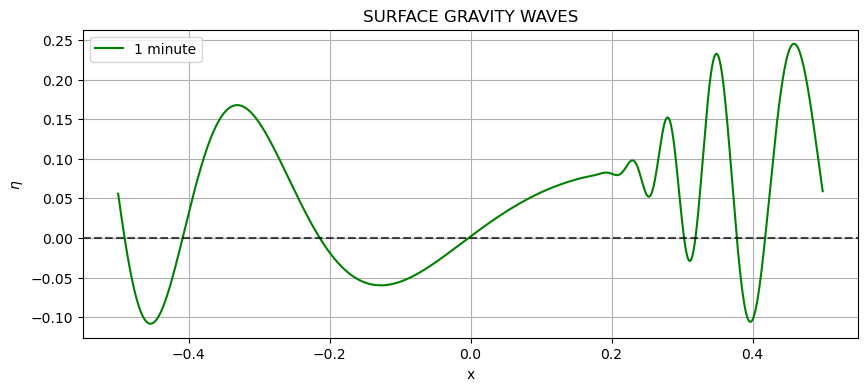

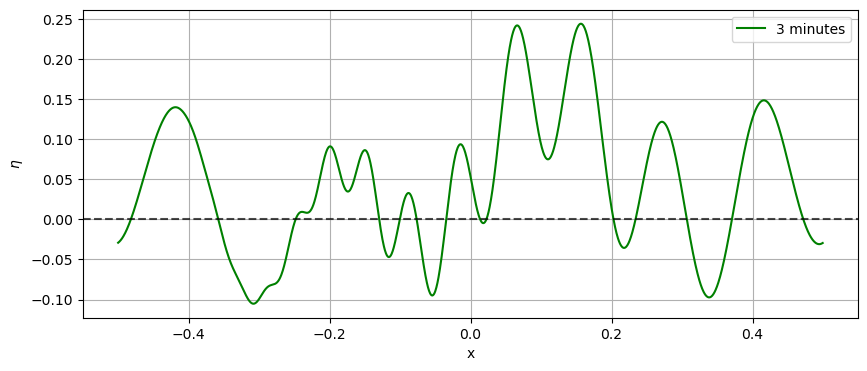

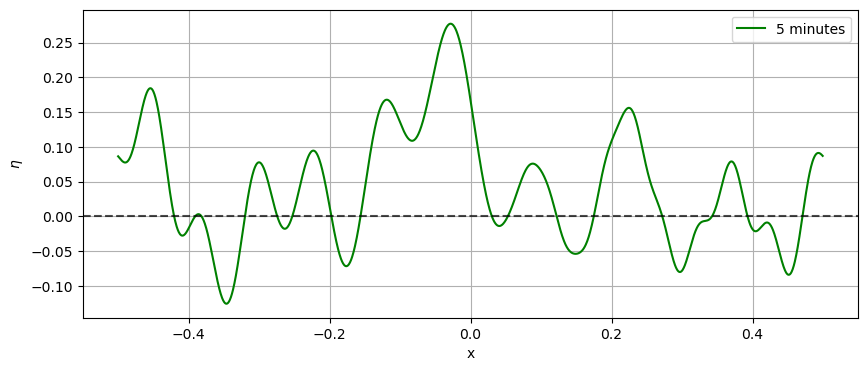

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the parameters
L = 1e3  # domain size
epsilon = 0.025  # Gaussian width
n_cosines = 1000  # number of cosines to use
n_points = n_cosines * 2  # number of points in x
g= 10   # gravity

# Set up the x axis
x = np.linspace(-0.5, 0.5, n_points, endpoint=False)

# Calculating k, k_x and A_n
k = np.arange(n_cosines)
A_n = np.sqrt(epsilon**2 * np.pi) * np.exp(-(epsilon * np.pi * k)**2)
k_x= 2 * np.pi * k / L

# Calculate the frequency and phase shift
omega = np.sqrt(g*k_x)
phase_shift = omega * 60  # minutes to seconds 


# Loop over different times
times = [1, 3, 5]  # in minutes
for t in times:
    # Calculate the Fourier series at the given time
    eta = np.zeros_like(x)
    for i in range(n_cosines):
        eta += A_n[i] * np.cos(2 * np.pi * k[i] * x - phase_shift[i] * t)

    # Plot the results
    fig=plt.figure(figsize=(10,4))
    if t==1:
        plt.plot(x, eta, label=f"{t} minute", color='green')
    else:
        plt.plot(x, eta, label=f"{t} minutes", color='green')
    plt.xlabel('x')
    plt.ylabel('$\eta$')
    if t==1:
        plt.title('Surface Gravity waves'.upper())
    else:
        pass
    plt.grid()
    plt.axhline(y=0, color='black', ls= '--', alpha=0.7 )
    plt.legend()
    plt.savefig('number1c_'+str(t), dpi=300)
    plt.show()

2. Take the Poincarre wave plots you produced in problem number one were for $\eta$. Plot the corresponding $u$ and $v$ fields.

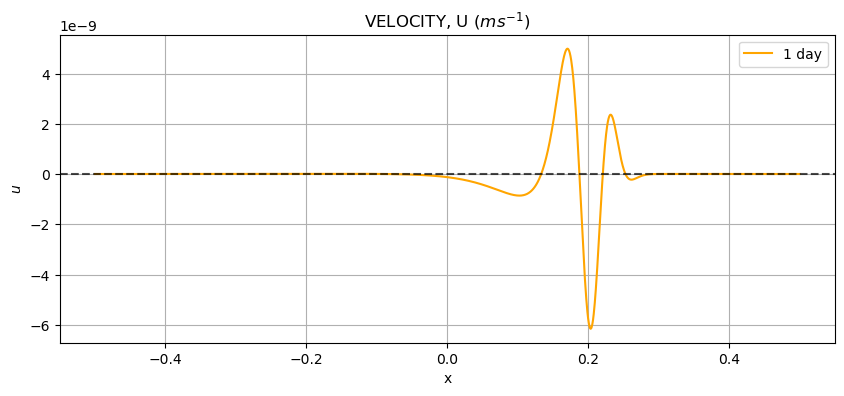

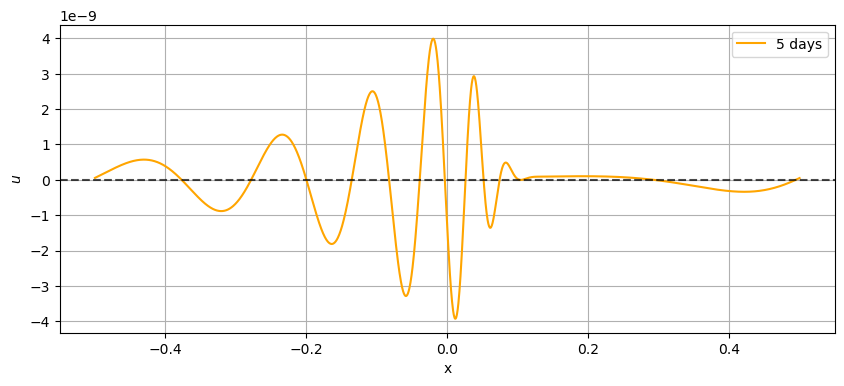

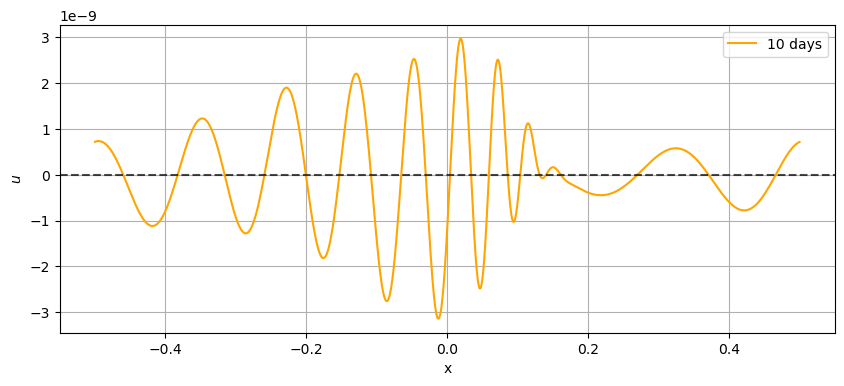

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the parameters
L = 4e6  # domain size
epsilon = 0.025  # Gaussian width
L_d = epsilon * L  # dispersion length scale
n_cosines = 1000  # number of cosines to use
n_points = n_cosines * 2  # number of points in x
f = 1e-4  # Coriolis parameter
c = f * L_d  # wave speed
H=L_d

# Set up the x axis
x = np.linspace(-0.5, 0.5, n_points, endpoint=False)

# Calculating k, k_x and A_n
k = np.arange(n_cosines)
A_n = np.sqrt(epsilon**2 * np.pi) * np.exp(-(epsilon * np.pi * k)**2)
k_x= 2 * np.pi * k / L

# Calculate the frequency and phase shift
omega = np.sqrt((c**2 * k_x **2) + f**2)
phase_shift = omega * 86400  # days to seconds 


# Loop over different times
times = [1, 5, 10]  # in days
for t in times:
    # Calculate the Fourier series at the given time
    u = np.zeros_like(x)
    for i in range(n_cosines):
        u += A_n[i] * np.cos(2 * np.pi * k[i] * x - phase_shift[i] * t)*(omega[i]/H*k[i])

    # Plot the results
    fig=plt.figure(figsize=(10,4))
    if t==1:
        plt.plot(x, u, label=f"{t} day", color='orange')
    else:
        plt.plot(x, u, label=f"{t} days", color='orange')
    plt.xlabel('x')
    plt.ylabel('$u$')
    if t==1:
        plt.title('velocity, u'.upper() + ' ($ms^{-1})$')
    else:
        pass
    plt.grid()
    plt.axhline(y=0, color='black', ls= '--', alpha=0.7 )
    plt.legend()
    plt.savefig('number2u_'+str(t), dpi=300)
    plt.show()

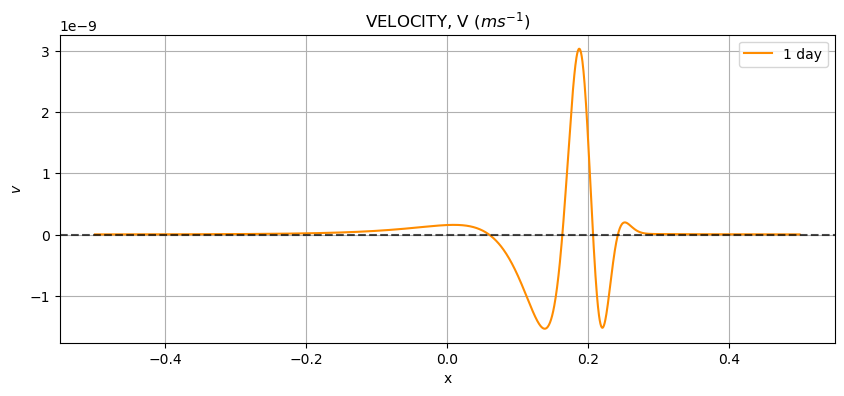

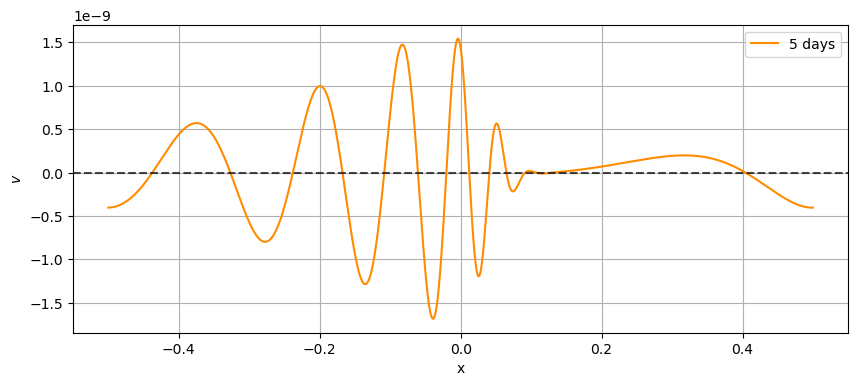

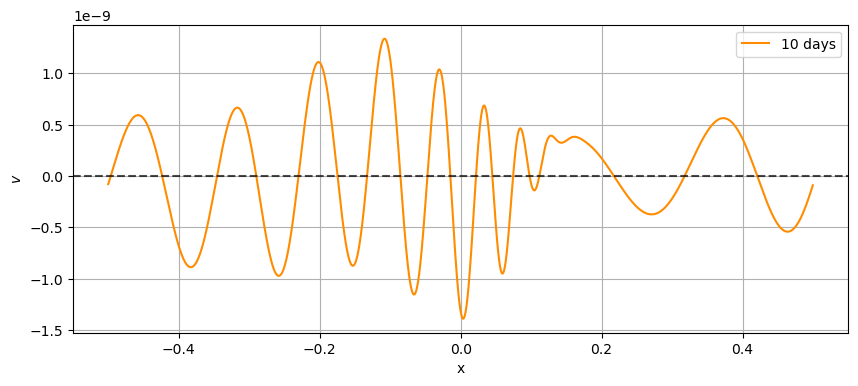

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the parameters
L = 4e6  # domain size
epsilon = 0.025  # Gaussian width
L_d = epsilon * L  # dispersion length scale
n_sines = 1000  # number of cosines to use
n_points = n_sines * 2  # number of points in x
f = 1e-4  # Coriolis parameter
c = f * L_d  # wave speed
H=L_d

# Set up the x axis
x = np.linspace(-0.5, 0.5, n_points, endpoint=False)

# Calculating k, k_x and A_n
k = np.arange(n_sines)
A_n = np.sqrt(epsilon**2 * np.pi) * np.exp(-(epsilon * np.pi * k)**2)
k_x= 2 * np.pi * k / L

# Calculate the frequency and phase shift
omega = np.sqrt((c**2 * k_x **2) + f**2)
phase_shift = omega * 86400  # days to seconds 


# Loop over different times
times = [1, 5, 10]  # in days
for t in times:
    # Calculate the Fourier series at the given time
    v = np.zeros_like(x)
    for i in range(n_sines):
        v += A_n[i] * np.sin(2 * np.pi * k[i] * x - phase_shift[i] * t)*(f/H*k[i])

    # Plot the results
    fig=plt.figure(figsize=(10,4))
    if t==1:
        plt.plot(x, v, label=f"{t} day", color='darkorange')
    else:
        plt.plot(x, v, label=f"{t} days", color='darkorange')
    plt.xlabel('x')
    plt.ylabel('$v$')
    if t==1:
        plt.title('velocity, v'.upper() + ' ($ms^{-1})$')
    else:
        pass
    plt.grid()
    plt.axhline(y=0, color='black', ls= '--', alpha=0.7 )
    plt.legend()
    plt.savefig('number2v_'+str(t), dpi=300)
    plt.show()

3. Repeat question 2 but instead taking the Poincarr´e wave plots you produced in problem number one to be for $u$. Plot the corresponding $\eta$ and $v$ fields.

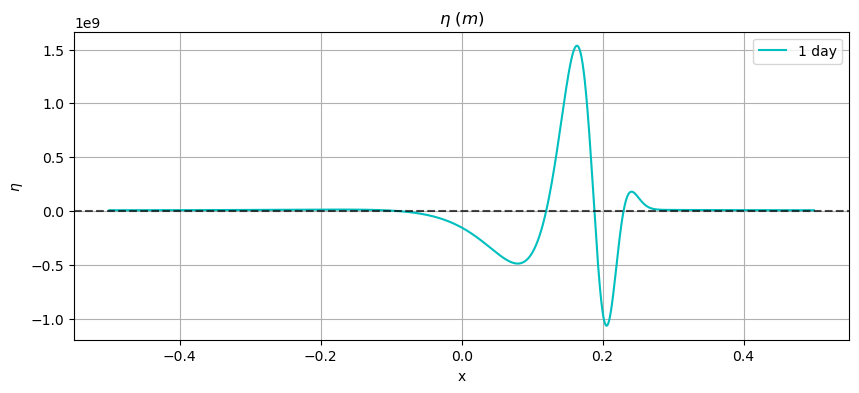

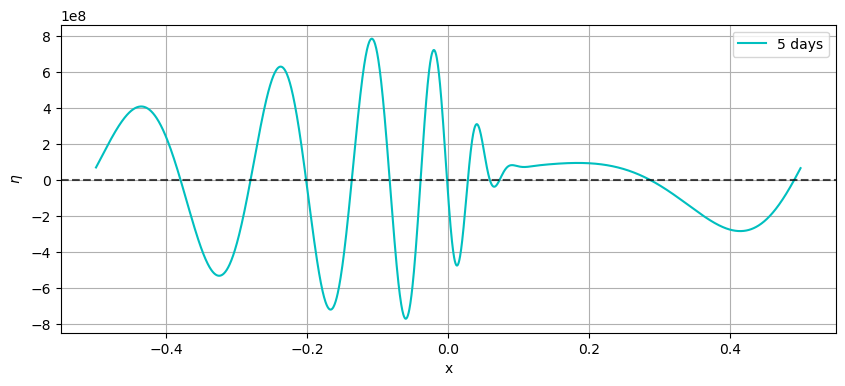

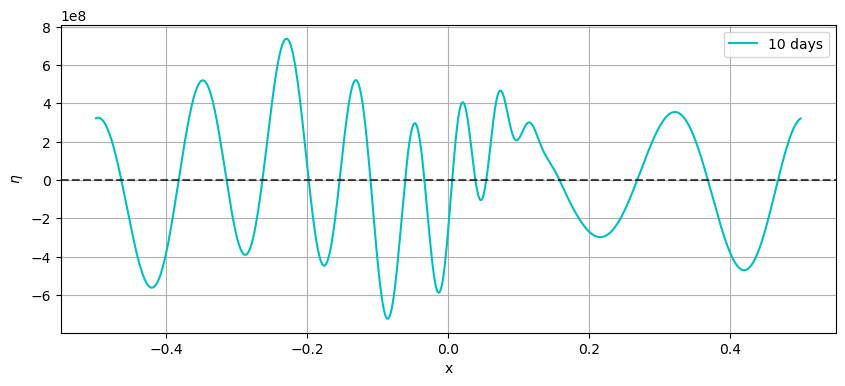

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the parameters
L = 4e6  # domain size
epsilon = 0.025  # Gaussian width
L_d = epsilon * L  # dispersion length scale
n_cosines = 1000  # number of cosines to use
n_points = n_cosines * 2  # number of points in x
f = 1e-4  # Coriolis parameter
c = f * L_d  # wave speed
H=L_d

# Set up the x axis
x = np.linspace(-0.5, 0.5, n_points, endpoint=False)

# Calculating k, k_x and A_n
k = np.arange(n_cosines)
A_n = np.sqrt(epsilon**2 * np.pi) * np.exp(-(epsilon * np.pi * k)**2)
k_x= 2 * np.pi * k / L

# Calculate the frequency and phase shift
omega = np.sqrt((c**2 * k_x **2) + f**2)
phase_shift = omega * 86400  # days to seconds 


# Loop over different times
times = [1, 5, 10]  # in days
for t in times:
    # Calculate the Fourier series at the given time
    eta = np.zeros_like(x)
    for i in range(n_cosines):
        eta += A_n[i] * np.cos(2 * np.pi * k[i] * x - phase_shift[i] * t)*(H*k[i]/omega[i])

    # Plot the results
    fig=plt.figure(figsize=(10,4))
    if t==1:
        plt.plot(x, eta, label=f"{t} day", color='c')
    else:
        plt.plot(x, eta, label=f"{t} days", color='c')
    plt.xlabel('x')
    plt.ylabel('$\eta$')
    if t==1:
        plt.title('$\eta$' + ' $ (m)$')
    else:
        pass
    plt.grid()
    plt.axhline(y=0, color='black', ls= '--', alpha=0.7 )
    plt.legend()
    plt.savefig('number3eta_'+str(t), dpi=300)
    plt.show()

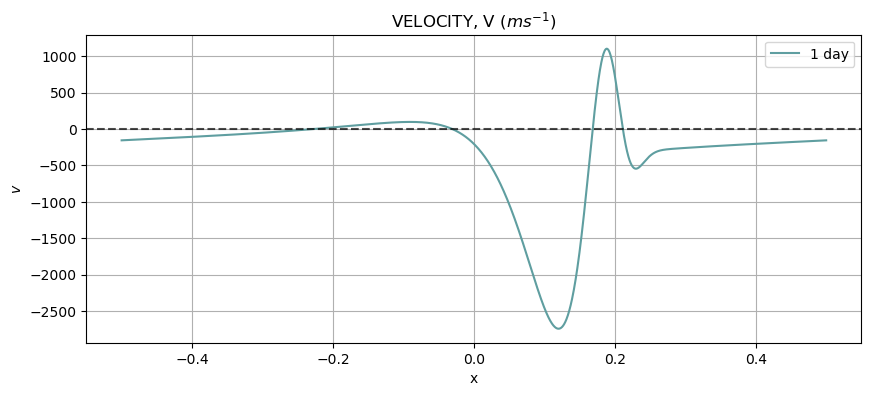

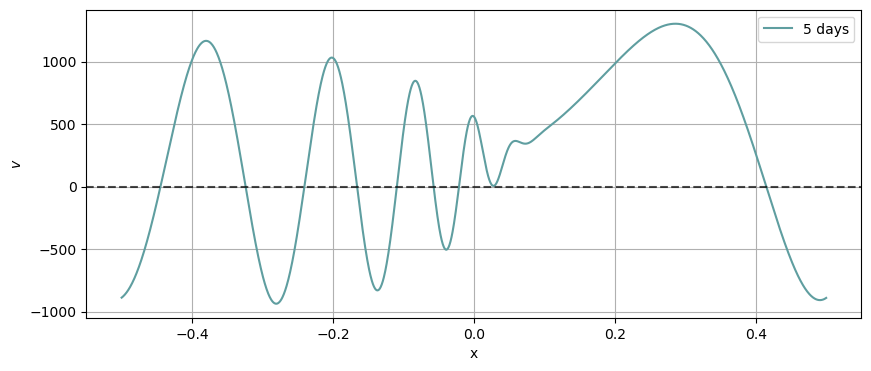

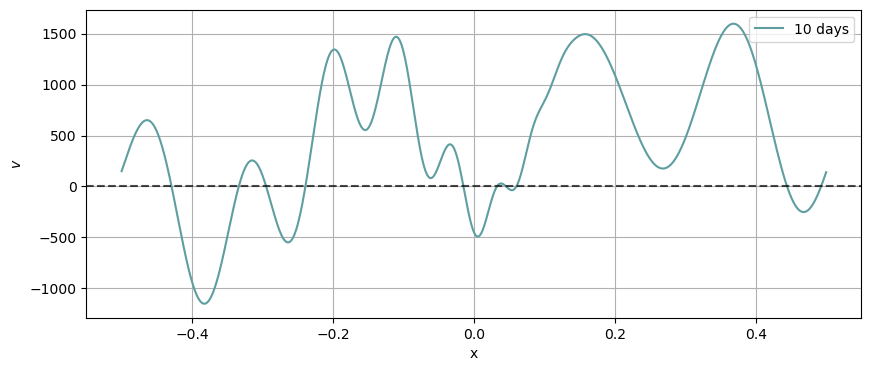

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the parameters
L = 4e6  # domain size
epsilon = 0.025  # Gaussian width
L_d = epsilon * L  # dispersion length scale
n_cosines = 1000  # number of cosines to use
n_points = n_cosines * 2  # number of points in x
f = 1e-4  # Coriolis parameter
c = f * L_d  # wave speed
H=L_d

# Set up the x axis
x = np.linspace(-0.5, 0.5, n_points, endpoint=False)

# Calculating k, k_x and A_n
k = np.arange(n_cosines)
A_n = np.sqrt(epsilon**2 * np.pi) * np.exp(-(epsilon * np.pi * k)**2)
k_x= 2 * np.pi * k / L

# Calculate the frequency and phase shift
omega = np.sqrt((c**2 * k_x **2) + f**2)
phase_shift = omega * 86400  # days to seconds 


# Loop over different times
times = [1, 5, 10]  # in days
for t in times:
    # Calculate the Fourier series at the given time
    v = np.zeros_like(x)
    for i in range(n_cosines):
        v += A_n[i] * np.sin(2 * np.pi * k[i] * x - phase_shift[i] * t)/(omega[i])

    # Plot the results
    fig=plt.figure(figsize=(10,4))
    if t==1:
        plt.plot(x, v, label=f"{t} day", color='cadetblue')
    else:
        plt.plot(x,v, label=f"{t} days", color='cadetblue')
    plt.xlabel('x')
    plt.ylabel('$v$')
    if t==1:
        plt.title('velocity, v'.upper() + ' ($ms^{-1})$')
    else:
        pass
    plt.grid()
    plt.axhline(y=0, color='black', ls= '--', alpha=0.7 )
    plt.legend()
    plt.savefig('number3v_'+str(t), dpi=300)
    plt.show()